In [16]:
def run_command(command):
    import subprocess
    try:
        subprocess.run(command, shell=True, check=True)  # Exécute la commande spécifiée dans un sous-processus
    except subprocess.CalledProcessError as e:
        print(f"Échec de l'exécution de la commande avec le code d'erreur {e.returncode} : {e.output}")

def run_main():
    import subprocess
    command = "g++ main.cpp Point.cpp Segment.cpp Vecteur.cpp fonctions.cpp Graphe.cpp Arc.cpp obstacle.cpp -std=c++17 -o main"
    run_command(command)  # Exécute la commande pour compiler le programme principal
    output = subprocess.check_output(["./main"])  # Lit la sortie du programme principal
    best = output.decode('utf-8').split()  # Convertit la sortie en liste
    return best

l=run_main()
print(l)


['(1,0)', '(1,2)', '(3,0)', '(3,2)', '(5,1)', '(4,4)', '(7,0)', 'Fin', '(0,0)', '(1,2)', '(4,4)', '(5,3)', '7.25583']


In [22]:
points_str = ['(1,0)', '(1,2)', '(3,0)', '(3,2)', '(5,1)', '(4,4)', '(7,0)']

# Fonction pour convertir une chaîne de caractères en tuple de coordonnées
def str_to_tuple(point_str):
    point_str = point_str.strip('()')  # Supprimer les parenthèses
    x, y = point_str.split(',')  # Séparer les coordonnées
    return (float(x), float(y))  # Convertir en float et retourner le tuple




[(1.0, 0.0), (1.0, 2.0), (3.0, 0.0), (3.0, 2.0), (5.0, 1.0), (4.0, 4.0), (7.0, 0.0)]


In [24]:
obstacle_ch = l[0:l.index("Fin")]
chemin_optimal_ch = l[l.index("Fin")+1:-1]
distance_min = l[-1]
print(obstacle_ch)
print(chemin_optimal_ch)

['(1,0)', '(1,2)', '(3,0)', '(3,2)', '(5,1)', '(4,4)', '(7,0)']
['(0,0)', '(1,2)', '(4,4)', '(5,3)']


In [25]:
# Transformer la liste de chaînes en une liste de tuples
obstacle = [str_to_tuple(point_str) for point_str in obstacle_ch]
chemin_optimal = [str_to_tuple(point_str) for point_str in chemin_optimal_ch]

print(obstacle)
print(chemin_optimal)

[(1.0, 0.0), (1.0, 2.0), (3.0, 0.0), (3.0, 2.0), (5.0, 1.0), (4.0, 4.0), (7.0, 0.0)]
[(0.0, 0.0), (1.0, 2.0), (4.0, 4.0), (5.0, 3.0)]


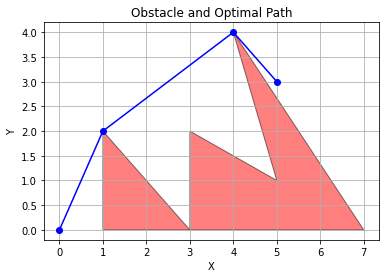

In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_obstacle(obstacle):
    fig, ax = plt.subplots()
    poly = Polygon(obstacle, closed=True, facecolor='red', edgecolor='black', alpha=0.5)
    ax.add_patch(poly)

def plot_path(path):
    x, y = zip(*path)
    plt.plot(x, y, color='blue', linestyle='-', marker='o', markersize=6)

def plot_obstacle_and_path(obstacle, path):
    plot_obstacle(obstacle)
    plot_path(path)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Obstacle and Optimal Path')
    plt.grid(True)
    plt.show()

plot_obstacle_and_path(obstacle, chemin_optimal)


In [29]:
import math

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 1 if val > 0 else 2

def convex_hull(points):
    n = len(points)
    if n < 3:
        return None
    
    hull = []
    l = 0
    for i in range(1, n):
        if points[i][0] < points[l][0]:
            l = i
    
    p = l
    q = 0
    while True:
        hull.append(points[p])
        q = (p + 1) % n
        for i in range(n):
            if orientation(points[p], points[i], points[q]) == 2:
                q = i
        p = q
        if p == l:
            break
    
    return hull

def area_of_polygon(points):
    n = len(points)
    area = 0
    for i in range(n):
        j = (i + 1) % n
        area += points[i][0] * points[j][1] - points[j][0] * points[i][1]
    return abs(area) / 2

def max_area_polygon(obstacles):
    convex_polygon = convex_hull(obstacles)
    max_area = 0
    max_polygon = None
    for i in range(len(convex_polygon)):
        for j in range(i + 2, len(convex_polygon)):
            area = area_of_polygon(convex_polygon[i:j+1])
            if area > max_area:
                max_area = area
                max_polygon = convex_polygon[i:j+1]
    return max_polygon


max_polygon = max_area_polygon(obstacle)
print("Points du polygone avec la plus grande surface :", max_polygon)
print("Surface du polygone :", area_of_polygon(max_polygon))



Points du polygone avec la plus grande surface : [(1.0, 0.0), (3.0, 0.0), (7.0, 0.0), (4.0, 4.0), (1.0, 2.0)]
Surface du polygone : 15.0


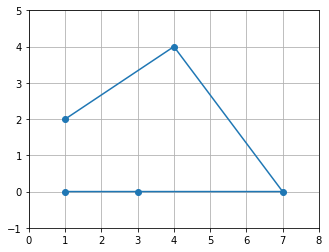

In [31]:
import matplotlib.pyplot as plt

def plot_polygon(points):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    plt.plot(x, y, '-o')

# Utilisez la fonction max_area_polygon pour obtenir le polygone avec la plus grande surface
max_polygon = max_area_polygon(obstacle)

# Afficher les points du polygone
plot_polygon(max_polygon)

# Définir les limites des axes pour une meilleure visualisation
plt.xlim(min(p[0] for p in obstacle) - 1, max(p[0] for p in obstacle) + 1)
plt.ylim(min(p[1] for p in obstacle) - 1, max(p[1] for p in obstacle) + 1)

# Afficher le graphique
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
